# Landlab Grid Creation and Topology

## Objective

Landlab supports a range of grid types. These include rasters (with both square and rectangular cells), and a range of structured and unstructured grids based around the interlocking polygons and triangles of a Voronoi-Delaunay tesselation (radial, hexagonal, and irregular grids).

In this exercise we will learn:

* How to create grid objects and assign data fields.
* Topological attributes of Grids and how to querry the connectivity of grid elements
* Node and link structure of the Grid
* Setting boundary conditions of a Grid

### Section 1: Creating grid objects:

We can create grid objects with a few lines of code. But first let's import Landlab, RasterModelGrid objects we need, and plotting functionality:


In [ ]:
import numpy as np     # import numpy for basic python 3 functionality
import landlab         # import landlab
from landlab import RasterModelGrid, VoronoiDelaunayGrid, HexModelGrid   # rastermodel sub classes


from landlab.plot import imshow_grid   # for plotting
import matplotlib.pyplot as plt 

If you would like to explore an object and its methods in Landlab you can type the name of the object with a question mark and execute the code:

In [ ]:
#RasterModelGrid?

Now we create a square model grid, let's call this grid **smg** 

In [ ]:
smg=RasterModelGrid((4,5),5.0)  # creates a square-cell raster grid with 4 rows and 5 columns with 5m grid cell size. 
                                # this grid does not contain any information.

print('number of rows=',smg.number_of_node_rows)
print('number of columns=',smg.number_of_node_columns)

The Landlab components use fields to share spatial information among themselves. We will now see how we can create a new Landlab field and add it to the grid we just created above. Landlab fields can be any quantitative or categorical variable or model parameters, such as elevation, land use type, soil moisture. We will generate a random elevation field ( a numpy array) below that has the same size of nodes of the grid we created and add that to the grid:

In [ ]:
z=100*np.random.rand(smg.number_of_nodes) # an array of a random field of elevations same size of the grid 

z=np.round([z],1)                         # round up the numbers so that they look simpler

smg.add_field('node','elevation',z)       # elevation added to nodes

imshow_grid(smg,'elevation')
#plt.show()

Now we create a square model grid, with a long and short side

In [ ]:
smg=RasterModelGrid((4,5),xy_spacing=(10., 5.))  # this grid has a width 10m (x-axis) and height of 5m (y-axis)

z=100*np.random.rand(smg.number_of_nodes) # now create an array of a random field of elevations same size of the grid 

z=np.round([z],1) # round upthe numbers so that they look simpler

smg.add_field('node','elevation',z)    # elevation added to nodes

imshow_grid(smg,'elevation')
#plt.show()

Now we create a hexagonal model grid. Let's call this grid **hmg**

In [ ]:
#HexModelGrid?

In [ ]:
hmg = HexModelGrid(shape=(4, 5), spacing=5.0)   # Hex grid with 5 m spacing

z=100*np.random.rand(hmg.number_of_nodes) # now create an array of a random field of elevations same size of the grid 

z=np.round([z],1) # round upthe numbers so that they look simpler

hmg.add_field('node','elevation',z)    # elevation added to nodes

imshow_grid(hmg,'elevation')

#plt.show()

Now we create a VoronoiDelaunayGrid. Let's call this grid **vmg**. In this grid we will need to input the coordinates of the centers of the Voronoi polygons. For this example we will generate x and y coordinates. Those x and y points can be locations of raingages or any observation that you would like to develop a spatial data model.

In [ ]:
# VoronoiDelaunayGrid?

In [ ]:
x = np.random.rand(100) * 100.  ## this could be your observational points, such as raingage. 
y = np.random.rand(100) * 100.

vmg = VoronoiDelaunayGrid(x, y)  # this grid has a width 10m (x-axis) and height of 5m (y-axis)

z=100*np.random.rand(vmg.number_of_nodes) # now create an array of a random field of elevations same size of the grid 

z=np.round([z],1) # round upthe numbers so that they look simpler

vmg.add_field('node','elevation',z)    # elevation added to nodes

imshow_grid(vmg,'elevation')

### Section 2: Topology of Landlab grids

**[See Figures 3 and 5 from Hobley et al.(2017): https://esurf.copernicus.org/articles/5/21/2017/]**

**Examples below are explained in detail in Landlab_MG_FD_Practice.pptx**

All grids consist of two interlocked sets of points joined by lines outlining areas. If we define data on the points we call **nodes**, then they are joined by **links**, which outline **patches**. Each node within the interior of the grid lies at the geometric center of the area of a **cell**. The cell's edges are **faces**, and the endpoints of the faces---which are also vertices of the cells---are **corners**.

Note that this kind of scheme requires one set of features to be "dominant" over the other; i.e., either not every node has a cell, or not every link is crossed by a face. Both cannot be true, because one or other set of features has to define the edge of the grid. Landlab assumes that the node set is primary, so there are always **more nodes than corners; more links than faces; and more patches than cells.**

Each of these sets of **"elements"** has its own set of IDs. These IDs are what allow us to index the various Landlab fields, which store spatial data. Each feature is ordered by **x, then y**. The origin is always at the bottom left node, unless you choose to move it (grid.move_origin)... except in the specific case of a radial grid, where logic and symmetry dictates it must be the central node.

Whenever Landlab needs to order something rotationally (angles; elements around a different element type), it does so following the standard mathematical convention of **counterclockwise from east**. We'll see this in practical terms a bit later in this tutorial.

The final thing to know is that **links and faces** have directions. This lets us record fluxes on the grid by associating them with, and mapping them onto, the links (or, much less commonly, the faces). All lines point into the **upper right half-space**. So, on our raster, this means the **horizontal links point east and the vertical links point north**.

In [ ]:
smg=RasterModelGrid((4,5),5.0)  # this creates a square-cell raster grid with 4 rows and 5 columns with 5m grid cell size

z=smg.add_zeros('topographic__elevation', at='node') # now create an empty array of same size of the grid 
# add elevations to the core nodes of the grid. Note that the first set of nodes in all four sides of the domain are boundary nodes, 
#therefore elevations assigned below will be in the middle of the domain. See slide 9 of Landlab_MG_FD_Practice.pptx.

z[6] = 7.0
z[7] = 5.0
z[8] = 7.0
z[11] = 8.0
z[12] = 6.0
z[13] = 8.0

Reshape the array into a 4 by 5 matrix

In [ ]:
print('number of nodes=', smg.number_of_nodes)
print('number of core nodes=', smg.number_of_core_nodes)
print('number of cells=', smg.number_of_cells)
print('number of links=', smg.number_of_links)

Create a plot of the surface. Print core node topology (details in slide 10)

In [ ]:
imshow_grid(smg,'topographic__elevation', plot_name = 'Topographic Elevation', 
            var_name = 'Elevation', var_units = 'm', grid_units = ('m','m'), 
            cmap = 'jet', limits = (0, 8))

#plt.show()

Let's print the link topology. You can compare the output with slide 9.

In [ ]:
print('core nodes=', smg.core_nodes)
print('core node elevations=',smg.at_node['topographic__elevation'][smg.core_nodes])
print('active links=', smg.active_links)
print('boundary nodes=', smg.boundary_nodes)

Topological information is recorded within our grid objects, and can be used to work with data arrays that are defined over the grid. The grid records the numbers of each element, their positions, and their relationships with one another. Let's take a look at some of this information for the raster:

For each node we will print their x, y, z values.

In [ ]:
for i in range(smg.number_of_nodes):
    print(i, smg.x_of_node[i], smg.y_of_node[i], smg.at_node['topographic__elevation'][i])

Link connectivity and direction is described by specifying the starting ("tail") and ending ("head") node IDs for each link (to remember this, think of an arrow: TAIL ===> HEAD).


In [ ]:
for i in range(smg.number_of_links):
    print('Link', i, ':  node', smg.node_at_link_tail[i], '===> node',
          smg.node_at_link_head[i])

Let's list links and link directions at node 11, compare the values with slide 9 node 11:

In [ ]:
print("links at node 11=", smg.links_at_node[11])
print("link directions at node 11=", smg.link_dirs_at_node[11])

### Section 3: Calculating the gradient of a node field and writing a linear flux rule at links

In this section we will re-create the topography we used earlier to remind the elevations to ourselves. Then we will calculate the gradients of a node elevation field, with one gradient value for each link, and estimate fluxes in all links of a node for a linear model of the sort: q=KS (ie. Darcy flux) applied per unit height of a saturated column.  

**Restart & Clear all** before you sart here.



In [ ]:
import landlab         # import landlab
from landlab import RasterModelGrid  # rastermodel sub classes
import numpy as np

from landlab.plot import imshow_grid   # for plotting
import matplotlib.pyplot as plt 

In [ ]:
smg=RasterModelGrid((4,5),5.0)  # this creates a square-cell raster grid with 4 rows and 5 columns with 5m grid cell size

z=smg.add_zeros('topographic__elevation', at='node') # now create an empty array
z[6] = 7.0
z[7] = 5.0
z[8] = 7.0
z[11] = 8.0
z[12] = 6.0
z[13] = 8.0

 **calc_grad_at_link(node_values, out=None)**
 
Calculates the gradient in node_values at each link in the grid, returning an array of length number_of_links.

We will calculate the gradients at node [7] and relate the slopes to the elevation field.

In [ ]:
slope_at_link = smg.calc_grad_at_link(z)[smg.links_at_node[7]] # here we use

print("links at node 7=", smg.links_at_node[7])  # ID of the links

print("link directions at node 7=", smg.link_dirs_at_node[7])  # direction of the links at node 7

print('slopes at link 7=', slope_at_link)

Above, the link directions indicate the following: (-) outgoing from node, (+) incoming to node. You can verify the calculated slopes above with **slide 14**.

Below we calculate slopes at each link. In the array printed there are 31 slope values, one for each of the four links that surround a single node.

In [ ]:
slope_at_link = smg.calc_grad_at_link(z)
slope_at_link

Now implement the Darcy flux equation

In [ ]:
K = 1 #m/d saturated hydraulic conductivity for sand
q = -K * slope_at_link # Darcy flux at links
q

**calc_net_flux_at_node(unit_flux_at_links, out=None)**

Calculate net link fluxes at nodes.

Given a flux per unit width along each link in the grid, calculate the net outflux (or influx, if negative) at each node. Fluxes are treated as zero for links that have no faces, and net fluxes are treated as zero for nodes that have no cell. Below we calculate net flux given the flux vector, q, which was calculated above:

In [ ]:
smg.calc_net_flux_at_node(q)

**calc_flux_div_at_node(unit_flux, out=None)**

Calculates divergence of link-based fluxes at nodes.

Here we will implement the Darcy flow application per unit height of a saturated soil column.

Given a flux per unit width across each face in the grid, this function calculates **the net outflux (or influx, if negative) divided by cell area, at each node** (zero or “out” value for nodes without cells). This gives **change in elevation of the state variable**. Here our example gives changes in water table elevation per unit height of saturated thickness from a single time step of the linear transport equation (q=KS). 

In [ ]:
dqda = -smg.calc_flux_div_at_node(q)

imshow_grid(smg,dqda)

**Real world catchment example**

Let's implement the same analysis to an actual small headwater elevation map. We will use Hugo_ws_10m.asc. This watershed is named after Hugo Gutierrez who set up a monitoring network in this catchment for his PhD work. https://expertise.utep.edu/profiles/hagutierrez. We will import and use a new function called **read_esri_ascii**. 

Let's **restart** the Kernel and clear all

In [ ]:
import landlab         # import landlab
from landlab import RasterModelGrid  # rastermodel sub classes
import numpy as np

from landlab.plot import imshow_grid   # for plotting
#import matplotlib.pyplot as plt 

In [ ]:
from landlab.io import read_esri_ascii  # reading an esri ascii file

(rmg,Z)=read_esri_ascii('Hugo_ws_10m.asc', name='topographic__elevation')  # rmg is the raster name and Z holds the elevation field

imshow_grid(rmg,'topographic__elevation', plot_name = 'Topographic Elevation', 
            var_name = 'Elevation', var_units = 'm', grid_units = ('m','m'), limits = (1660, 1710))

**Let's do a nice 3D plot of this watershed**

In [ ]:
# import plotting tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# create a plotting routine to make a 3d plot of our surface. 
def surf_plot(rmg, surface='topographic__elevation', title='Surface plot of topography'):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    Z = rmg.at_node[surface].reshape(rmg.shape)
    color = cm.jet((Z-Z.min())/(Z.max()-Z.min()))
    surf = ax.plot_surface(rmg.x_of_node.reshape(rmg.shape), rmg.y_of_node.reshape(rmg.shape), 
                           Z,
                           rstride=1, cstride=1,
                           facecolors=color,
                           linewidth=1., 
                           antialiased=False)
    ax.view_init(elev=60, azim=10)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Elevation')
    plt.title(title)
    plt.show()

In [ ]:
surf_plot(rmg, title='Watershed')

Below we will calculate local slopes at the nodes. This function calculates the mean slope of the cell based on patches

In [ ]:
S = rmg.calc_slope_at_node(Z)   # calculate slopes
rmg.add_field('node','Slope',S, clobber=True)  # let's call this slope field and add it to the grid

imshow_grid(rmg,'Slope', plot_name = 'Local Slope', 
            var_name = 'Slope', var_units = 'm/m', grid_units = ('m','m'), limits = (0, 0.6))

**Calculate slope and flux at each link:** We estimate the movement of subsurface flow from the Darcy equation at each four links of a cell, using 1 m depth for subsurface flow everywhere.

In [ ]:
Slope_at_link = rmg.calc_grad_at_link(Z)

K = 1 #m/d saturated hydraulic conductivity for sand
q_hb = -K * Slope_at_link # Darcy flux at links for the Hugo basin
q_hb

**Calculate flow divergence:** This function sums up all the flows that are coming into and leaving from the cell (ie. mass balance) and divide the resulting mass to the area of the cell. The resulting field is change in water table elevations during a day in m. 

In [ ]:
Dqda = -rmg.calc_flux_div_at_node(q_hb)

rmg.add_field('node','Flow_Div',Dqda, clobber=True)  


imshow_grid(rmg,'Flow_Div', plot_name = 'Flow divergence', 
          var_name = 'Change in water table depth', var_units = 'm', grid_units = ('m','m'), limits = (-0.18, 0.2))

As you can see in the figure above, valleys gain and uplands lose water. To visualize the valleys that gain water we can use a binary plot, by **only plotting cells that are positive as 1** and the rest will be 0.

In [ ]:
rmg.at_node['Flow_Div'][np.where(Dqda>0)] = 1 
imshow_grid(rmg,'Flow_Div')

**GROUP DISCUSSION:**
In your group discuss how we can calculate changes in groundwater table for another daily time step. You can insert lines to this notebook and perform your calculations.  

### Section 4: Setting watershed boundary conditions on a raster grid

* This tutorial ilustrates how to set watershed boundary conditions on a raster grid.
* Note that a watershed is assumed to have a ring of nodes around the core nodes that are closed boundaries (i.e. no flux can cross these nodes, or more correctly, no flux can cross the faces around the nodes).
* This means that automatically the nodes on the outer perimeter of the grid will be set to be closed boundary.
* By definitation a watershed also has one outlet through which fluxes can pass. Here the outlet is set as the node that has the lowest value, is not a nodata_value node, and is adjacent to at least one closed boundary node.
* This means that an outlet can be on the outer perimeter of the raster. However, the outlet does not need to be on the outer perimeter of the raster.



* CORE_NODE: 0; 
* CLOSED_BOUNDARY: 4
* FIXED_VALUE_BOUNDARY: 1 (e.g. outlet)
* TRACKS_CELL_BOUNDARY:  3 (looped boundary);  

Let's **restart Kernel & clear all** first create the same simple topography above and print the status of the nodes.

In [1]:
import landlab         # import landlab
from landlab import RasterModelGrid  # rastermodel sub classes
import numpy as np

from landlab.plot import imshow_grid   # for plotting

In [2]:
smg=RasterModelGrid((4,5),5.0)  # this creates a square-cell raster grid with 4 rows and 5 columns with 5m grid cell size

z=smg.add_zeros('topographic__elevation', at='node') # now create an empty array of same size of the grid 
# add elevations to the core nodes of the grid. Note that the first set of nodes in all four sides of the domain are boundary nodes, 
#therefore elevations assigned below will be in the middle of the domain. See slide 9 of Landlab_MG_FD_Practice.pptx.

z[6] = 7.0
z[7] = 5.0
z[8] = 7.0
z[11] = 8.0
z[12] = 6.0
z[13] = 8.0

In [3]:
for i in range(smg.number_of_nodes):
    print(i, smg.status_at_node[i])

0 1
1 1
2 1
3 1
4 1
5 1
6 0
7 0
8 0
9 1
10 1
11 0
12 0
13 0
14 1
15 1
16 1
17 1
18 1
19 1


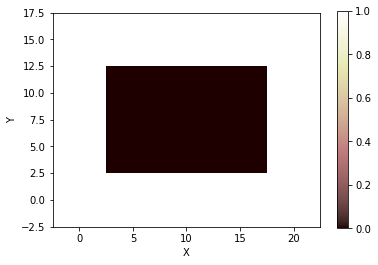

In [4]:
imshow_grid(smg, smg.status_at_node)

As you can see here Landlab automatically adjust the most outer ring of nodes as **fixed value or outlet =1** that means that if water is routed the runoff would naturally leave the domain from those nodes. **Core nodes are in the center = 0**. 

**Changing the boundary status of a single node:** Let's now set closed node at a specified node #2.

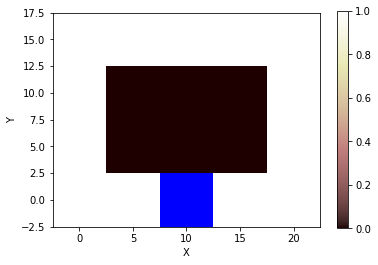

In [5]:
smg.status_at_node[2] = smg.BC_NODE_IS_CLOSED
imshow_grid(smg, smg.status_at_node, color_for_closed='blue')

**Changing the boundary status of nodes along edges:**

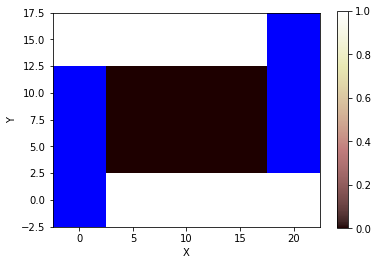

In [6]:
smg.set_status_at_node_on_edges(right=smg.BC_NODE_IS_CLOSED, 
                                top=smg.BC_NODE_IS_FIXED_VALUE, 
                                left=smg.BC_NODE_IS_CLOSED, 
                                bottom=smg.BC_NODE_IS_FIXED_VALUE)

imshow_grid(smg, smg.status_at_node, color_for_closed='blue')

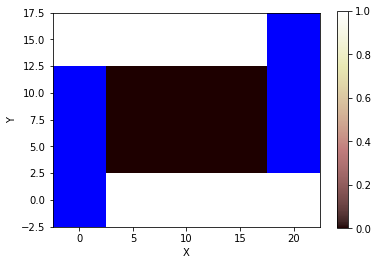

In [8]:
#The same task can be written in this form as well
smg.set_status_at_node_on_edges(right=4, top=1, left=4, bottom=1)
imshow_grid(smg, smg.status_at_node, color_for_closed='blue')

For more Landlab tutorials, click here: https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html

## Class Exercise

Create a new Jupyter notebook and implement the steps below:

* Create a square-cell raster grid with 6 rows and 6 columns with 5 m grid cell spacing

* Design an elevation field that will resamble an open-book-like catchment (similar to above). Make it drain (South) towards the bottom of the domain.

* Attach the elevation field to the raster model grid and assign an outlet and close all other boundaries.

* Map the elevation field.

* Print the numbers of nodes, links and core nodes and show where the outlet is.

* Assume D=1 for the linear diffusion transport equation, q=-DS, and calculate and map flux divergence at node. This should give elevation change in the watershed as a result of the linear transport model. D uses a much exaggerated value.  

* Map the node status on your grid.

## Related tutorials 

Tutorials listed below can be found in the interactive notebook binder link:

* Introduction to the model grid object 
* Introduction to Landlab data fields 
* Using the gradient and flux-divergence functions 
* Introduction to plotting output with Landlab 

https://landlab.readthedocs.io/en/latest/user_guide/tutorials.html


